Setup

In [2]:
import pandas as pd
from datetime import datetime

# Load the starter data
df_unified = pd.read_csv('../data/raw/ethiopia_fi_unified_data.csv')

# Load reference codes to ensure your 'indicator_code' and 'pillar' are valid
ref_codes = pd.read_csv('../data/raw/reference_codes.csv')

# Enrichment Function

In [3]:
def add_record(df, record_type, pillar=None, indicator=None, indicator_code=None, 
               value=None, date=None, source_name=None, source_url=None, 
               notes=None, confidence='high'):
    
    new_row = {
        'record_type': record_type,
        'pillar': pillar,
        'indicator': indicator,
        'indicator_code': indicator_code,
        'value_numeric': value,
        'observation_date': date,
        'source_name': source_name,
        'source_url': source_url,
        'confidence': confidence,
        'collected_by': 'Your Name',
        'collection_date': datetime.now().strftime('%Y-%m-%d'),
        'notes': notes
    }
    
    return pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

# New Observation (Digital ID Progress)

In [4]:
df_unified = add_record(
    df_unified, 
    record_type='observation',
    pillar='Enablers',
    indicator='National ID (Fayda) Registrations',
    indicator_code='INF_DIGITAL_ID',
    value=3500000, # Example figure: 3.5M registered
    date='2024-12-01',
    source_name='NID Ethiopia',
    source_url='https://www.id.gov.et/',
    notes='Critical for KYC and onboarding unbanked populations'
)

# New Event (Fuel Payment Digitization)

In [5]:
df_unified = add_record(
    df_unified, 
    record_type='event',
    indicator='Mandatory Digital Fuel Payments',
    date='2023-04-24',
    source_name='Ministry of Transport',
    notes='Policy requiring all fuel transactions to be digital via Telebirr or CBE'
)

# New Impact Link

In [6]:
# Note: For impact_links, use the columns specified in your schema (lag, magnitude)
impact_row = {
    'record_type': 'impact_link',
    'parent_id': 'EVENT_ID_OR_NAME', # Link this to the Fuel Event
    'related_indicator': 'USG_DIGITAL_PAYMENT',
    'impact_direction': 'positive',
    'impact_magnitude': 0.15, # 15% estimated increase
    'lag_months': 3
}
df_unified = pd.concat([df_unified, pd.DataFrame([impact_row])], ignore_index=True)

# Data Quality Check & Export

OSError: Cannot save file into a non-existent directory: '../data/processed'

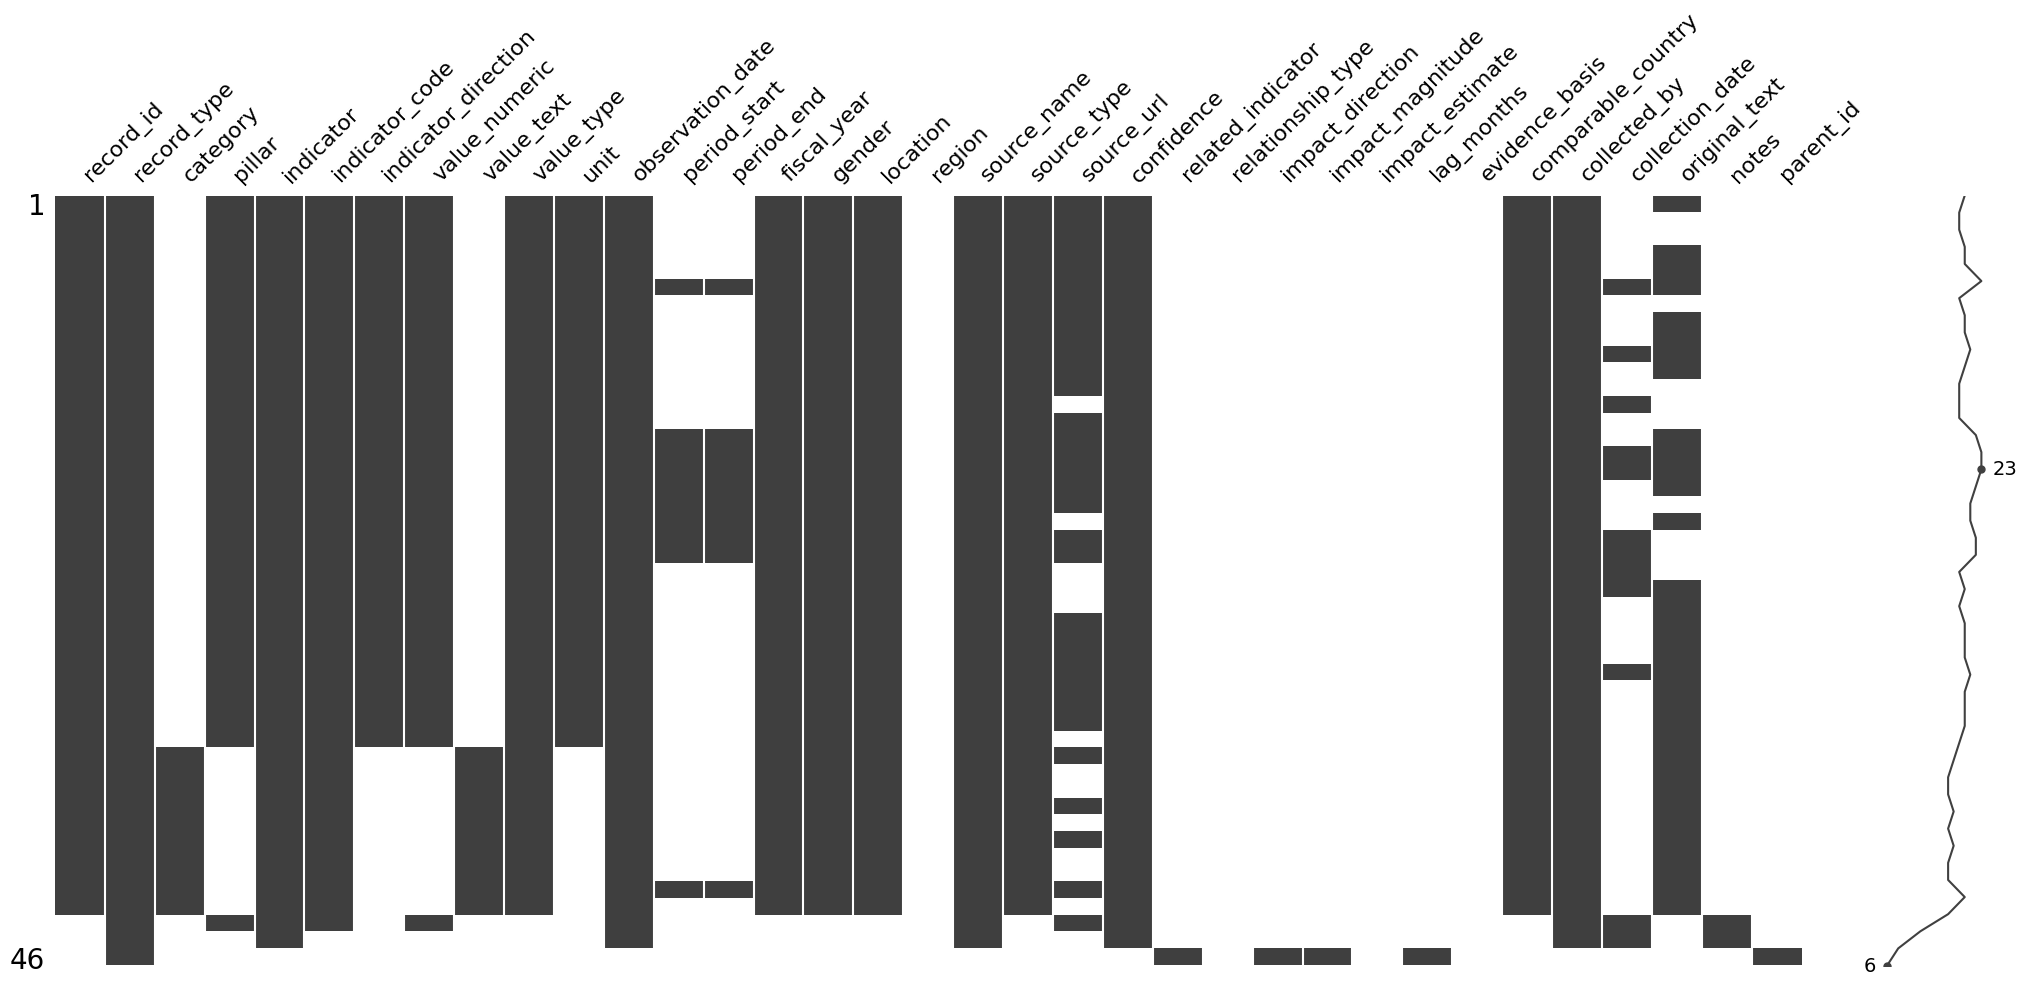

In [7]:
import missingno as msno

# Visualize where data is missing
msno.matrix(df_unified)

# Save to processed folder for Task 2
df_unified.to_csv('../data/processed/ethiopia_fi_enriched.csv', index=False)